<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

### 2024/2025, semestr zimowy
Tomasz Rodak

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

## Wykład XI

ISLP, rozdział 5

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import statsmodels.api as sm
from scipy.stats import multivariate_normal

## Bootstrap

Metoda oceny jakości estymatora.

Załóżmy, że dane są zmienne losowe $X$ i $Y$ o nieznanym rozkładzie. Chcemy wyznaczyć wartość parametru $\alpha$ tak, aby wariancja sumy $\alpha X + (1-\alpha) Y$ była minimalna. Zmienne $X$ i $Y$ mogą być np. notowaniami dwóch różnych akcji giełdowych. Wówczas $\alpha$ wyznacza proporcję akcji w portfelu inwestycyjnym. Wariancja tego portfela, czyli właśnie wariancja sumy $\alpha X + (1-\alpha) Y$, jest miarą ryzyka inwestycji. Poszukujemy zatem takiego $\alpha$, które minimalizuje ryzyko inwestycji.

Z matematycznego punktu widzenia, oznacza to minimalizację wyrażenia

\begin{equation*}
\operatorname{Var}(\alpha X + (1-\alpha) Y) = \alpha^2 \operatorname{Var}(X) + (1-\alpha)^2 \operatorname{Var}(Y) + 2 \alpha (1-\alpha) \operatorname{Cov}(X,Y)
\end{equation*}

Analizując to wyrażenie jako funkcję zmiennej $\alpha$ i biorąc pochodną, stwierdzamy że osiągnie ono minimum w punkcie

\begin{equation*}
\alpha = \frac{\operatorname{Var}(Y) - \operatorname{Cov}(X,Y)}{\operatorname{Var}(X) + \operatorname{Var}(Y) - 2 \operatorname{Cov}(X,Y)}
\end{equation*}

A zatem optymalna wartość $\alpha$ wyraża się poprzez wariancje i kowariancję zmiennych $X$ i $Y$ i w praktyce może być wyznaczona po oszacowaniu tych parametrów na podstawie dostępnych danych.

Rozważmy konkretny przykład: niech $(X,Y)$ będzie wektorem losowym o rozkładzie normalnym $N(\mu, \Sigma)$, gdzie $\mu = (0,0)$ i 

\begin{equation*}
\Sigma = 
\begin{bmatrix}
 1 & .5 \\ .5 & 1.25 
 \end{bmatrix}
\end{equation*}

Wówczas $\operatorname{Var}(X) = 1$, $\operatorname{Var}(Y) = 1.25$, $\operatorname{Cov}(X,Y) = .5$ i optymalna wartość $\alpha$ wynosi $0.6$. Generujemy $n=100$ wartości z tego rozkładu i dla uzyskanych danych wyznaczamy wartość 

\begin{equation*}
\hat{\alpha}= \frac{\hat\sigma_Y^2 - \hat\sigma_{XY}}{\hat\sigma_X^2 + \hat\sigma_Y^2 - 2 \hat\sigma_{XY}},
\end{equation*}

która jest estymatorem $\alpha$.

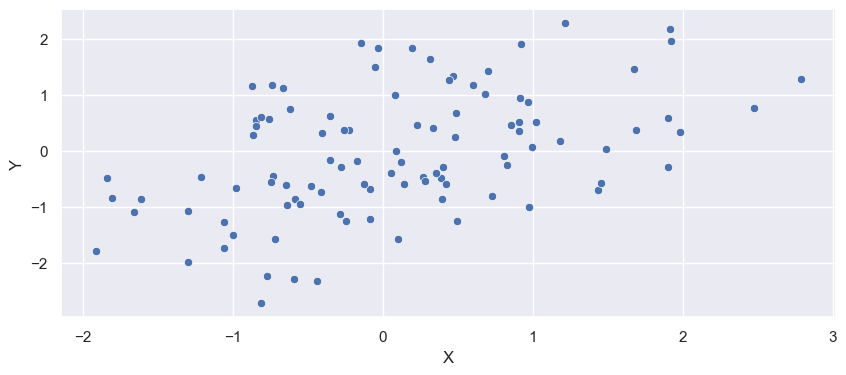

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))
n = 100
mu = np.array([0, 0])
sigma = np.array([[1, .5], [.5, 1.25]])
data = multivariate_normal(mu, sigma).rvs(size=n)
X, Y = data[:, 0], data[:, 1]
sns.scatterplot(x=X, y=Y, ax=ax)
ax.set(xlabel='X', ylabel='Y');

In [4]:
sigma_hat = np.cov(X, Y)
varX_hat, varY_hat, covXY_hat = sigma_hat[0, 0], sigma_hat[1, 1], sigma_hat[0, 1]
alpha_hat = (varY_hat - covXY_hat) / (varX_hat + varY_hat - 2 * covXY_hat)
alpha_hat

0.6003584193806935

In [5]:
np.var(alpha_hat * X + (1 - alpha_hat) * Y)

0.7803521331574546

Przy kolejnych powtórzeniach eksperymentu zmienia się wartość $\hat{\alpha}$. Jak bardzo $\hat{\alpha}$ może się różnić od prawdziwej wartości $\alpha$? Inaczej mówiąc, jak bardzo wartość $\hat{\alpha}$ jest wrażliwa na zmiany danych? Ponieważ znamy rozkład $(X,Y)$, więc informację tę uzyskamy eksperymentalnie tworząc wiele niezależnych prób z tego rozkładu. Dla każdej próby obliczamy wartość $\hat{\alpha}$ i otrzymujemy w ten sposób ciąg $\hat{\alpha}_1, \hat{\alpha}_2, \ldots, \hat{\alpha}_B$ dający eksperymentalny rozkład $\hat{\alpha}$. Dzięki temu możemy oszacować wariancję $\hat{\alpha}$ z dowolną dokładnością (zwiekszając liczbę powtórzeń eksperymentu $B$).

In [6]:
B = 1000
n = 100

alpha_hat = np.zeros(B)
alpha_hat[:] = np.nan


for i in range(B):
    data = multivariate_normal(mu, sigma).rvs(size=n)
    X, Y = data[:, 0], data[:, 1]
    sigma_hat = np.cov(X, Y)
    varX_hat, varY_hat, covXY_hat = sigma_hat[0, 0], sigma_hat[1, 1], sigma_hat[0, 1]
    alpha_hat[i] = (varY_hat - covXY_hat) / (varX_hat + varY_hat - 2 * covXY_hat)

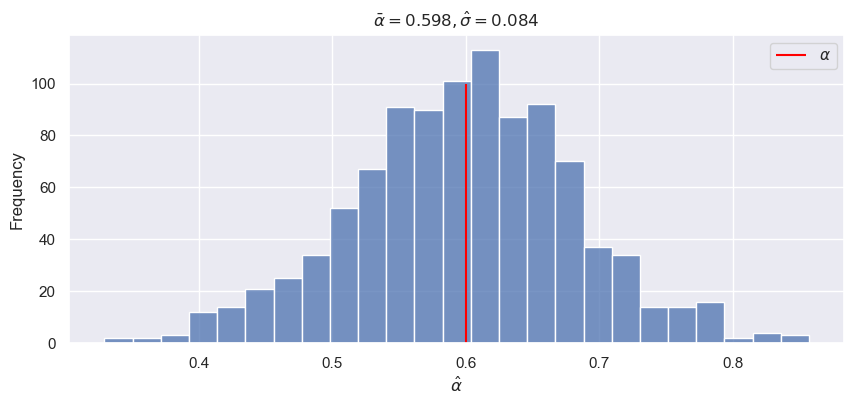

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
standard_error = np.sqrt(np.var(alpha_hat))
mean_alpha = np.mean(alpha_hat)
sns.histplot(x=alpha_hat, ax=ax)
ax.vlines(0.6, 0, 100, color='red', label=r'$\alpha$')
ax.set(xlabel=r'$\hat{\alpha}$', ylabel='Frequency', 
       title=r'$\bar\alpha = {:.3f}, \hat\sigma = {:.3f}$'.format(mean_alpha, standard_error))
ax.legend();

Do oceny jakości estymatora $\hat{\alpha}$ wykorzystaliśmy wiedzę o rozkładzie wektora $(X,Y)$. Wielokrotne powtórzenie eksperymentu pozwala na oszacowanie błędu standardowego, a im więcej powtórzeń, tym oszacowanie jest dokładniejsze. W praktyce rozkład wektora $(X,Y)$ jest nieznany, dostępna jest jedynie próba losowa $(x_1,y_1),\ldots,(x_n,y_n)$ i na jej podstawie musimy wyznaczyć ocenę niepewności estymatora $\hat{\alpha}$. Właśnie do tego celu służy metoda bootstrap.

Opis metody bootstrap. Załóżmy, że mamy $n$ obserwacji $(x_1,y_1),\ldots,(x_n,y_n)$ i chcemy wyznaczyć odchylenie standardowe estymatora $\hat{\theta}$ pewnego parametru $\theta$ o prawdziwej wartości nieznanej. Wartość estymatora $\hat{\theta}$ zależy funkcyjnie od próby $(x_1,y_1),\ldots,(x_n,y_n)$, próba ta jest jednak tylko jedna i nie widać żadnego sposobu na wygenerowanie kolejnych. Zamiast tego, metoda bootstrap generuje nowe próby z obserwacji $(x_1,y_1),\ldots,(x_n,y_n)$ i traktuje je dalej tak, jak gdyby to były nowe obserwacje. 

1. Generujemy $B$ prób bootstrapowych $(x_1^{*i},y_1^{*i}),\ldots,(x_n^{*i},y_n^{*i})$, $i=1,\ldots,B$. Próba bootstrapowa jest próbą losową złożoną z $n$ obserwacji wylosowanych z próby $(x_1,y_1),\ldots,(x_n,y_n)$ z powtórzeniami.
3. Dla każdej próby bootstrapowej wyznaczamy estymator $\hat{\theta}^{*i}$.
4. Na podstawie $B$ wartości $\hat{\theta}^{*i}$ wyznaczamy estymator wariancji $\hat{\theta}$:

\begin{equation*}
\widehat{\operatorname{Var}}(\hat{\theta}) = \frac{1}{B-1} \sum_{i=1}^B (\hat{\theta}^{*i} - \bar{\theta}^{*})^2,
\end{equation*}

gdzie $\bar{\theta}^{*} = \frac{1}{B} \sum_{i=1}^B \hat{\theta}^{*i}$.

Zastosujemy metodę bootstrap do wyznaczenia błędu standardowego estymatora $\hat{\theta}$.

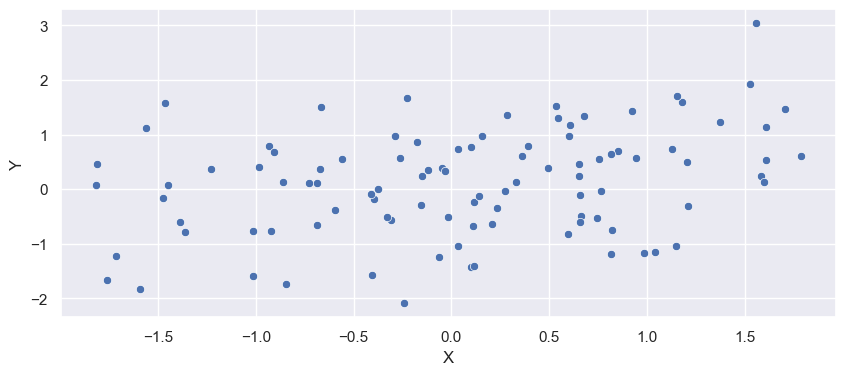

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
n = 100
mu = np.array([0, 0])
sigma = np.array([[1, 0.5], [0.5, 1.25]])
data = multivariate_normal(mu, sigma).rvs(size=n, random_state=42) # ustawienie ziarna
X, Y = data[:, 0], data[:, 1]
sns.scatterplot(x=X, y=Y, ax=ax)
ax.set(xlabel="X", ylabel="Y");

In [9]:
B = 1000
n = X.size
assert X.size == Y.size
rng = np.random.default_rng(42)
alpha_hatb = np.zeros(B)

for i in range(B):
    idx = rng.choice(n, size=n, replace=True) # losowanie indeksów z powtórzeniami
    Xb, Yb = X[idx], Y[idx]
    sigma_hat = np.cov(Xb, Yb)
    varX_hat, varY_hat, covXY_hat = sigma_hat[0, 0], sigma_hat[1, 1], sigma_hat[0, 1]
    alpha_hatb[i] = (varY_hat - covXY_hat) / (varX_hat + varY_hat - 2 * covXY_hat)

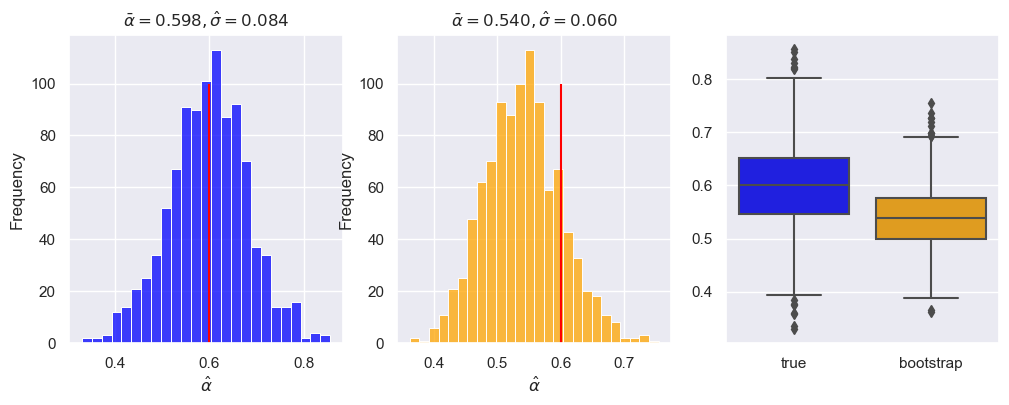

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
sns.histplot(x=alpha_hat, ax=ax1, color="blue")
ax1.vlines(0.6, 0, 100, color="red", label=r"$\alpha$")
ax1.set(
    xlabel=r"$\hat{\alpha}$",
    ylabel="Frequency",
    title=r"$\bar\alpha = {:.3f}, \hat\sigma = {:.3f}$".format(
        mean_alpha, standard_error
    ),
)
mean_alphab = np.mean(alpha_hatb)
standard_errorb = np.sqrt(np.var(alpha_hatb))
sns.histplot(x=alpha_hatb, ax=ax2, color="orange")
ax2.vlines(0.6, 0, 100, color="red", label=r"$\alpha$")
ax2.set(
    xlabel=r"$\hat{\alpha}$",
    ylabel="Frequency",
    title=r"$\bar\alpha = {:.3f}, \hat\sigma = {:.3f}$".format(
        mean_alphab, standard_errorb
    ),
)
df = pd.DataFrame({"true": alpha_hat, "bootstrap": alpha_hatb})
sns.boxplot(data=df, ax=ax3, palette=["blue", "orange"]);

### Przykład: szacowanie błędu standardowego w modelu regresji `mpg` względem `horsepower` metodą bootstrap




In [11]:
auto = pd.read_csv("data/Auto.csv", na_values="?")
auto.dropna(inplace=True)
X, y = auto["horsepower"].values, auto["mpg"].values

W modelu regresji błąd standardowy współczynnika $\beta_1$ wyznaczamy na podstawie wzoru

\begin{equation*}
\operatorname{SE}(\hat{\beta}_1) = \sqrt{\frac{\hat{\sigma}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}},
\end{equation*}

gdzie $\hat{\sigma}^2$ jest estymatorem wariancji reszt modelu regresji. Wartość $\hat{\sigma}^2$ jest równa

\begin{equation*}
\hat{\sigma}^2 = \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2,
\end{equation*}

gdzie $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$. Jak wypadnie porównanie błędu standardowego $\hat{\beta}_1$ wyznaczonego na podstawie wzoru z błędem standardowym wyznaczonym metodą bootstrap?

Oszacowanie zgodnie ze wzorem z modelu regresji:

In [12]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,39.9359,0.717,55.660,0.000,38.525,41.347
x1,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


Oszacowanie za pomocą metody bootstrap:

In [13]:
B = 1000
n = X.size
rng = np.random.default_rng(42)
beta0_hatb, beta1_hatb = np.zeros(B), np.zeros(B)

for i in range(B):
    idx = rng.choice(n, size=n, replace=True)
    Xb, yb = X[idx], y[idx]
    model = sm.OLS(yb, sm.add_constant(Xb))
    results = model.fit()
    beta0_hatb[i], beta1_hatb[i] = results.params

np.sqrt(np.var(beta0_hatb)), np.sqrt(np.var(beta1_hatb))

(0.8511969758708801, 0.007402133740901528)

Wyniki nieco się różnią. W modelu regresji błąd standardowy $\hat{\beta}_1$ jest wyznaczany na podstawie założenia o normalności reszt modelu. Metoda bootstrap nie zakłada żadnego rozkładu, a jedynie wykorzystuje dostępne dane. W tym przypadku metoda bootstrap daje większą wartość błędu standardowego, co może być spowodowane tym, że reszty modelu nie są rozłożone normalnie. 

W rzeczywistości z wcześniejszych zajęć wiemy, że zmienna `mpg` nie jest liniowo zależna od `horsepower`. W takiej sytuacji błąd standardowy wyznaczony metodą bootstrap jest bardziej wiarygodny.

Powtórzymy powyższy eksperyment dla modelu regresji `mpg` względem `horsepower` z uwzględnieniem kwadratu `horsepower`. Zaczynamy od wyznaczenia błędów standardowych współczynników $\beta_0$, $\beta_1$ i $\beta_2$ z modelu regresji:

In [14]:
X = np.hstack((X.reshape(-1, 1), X.reshape(-1, 1) ** 2))
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,56.9001,1.800,31.604,0.000,53.360,60.440
x1,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
x2,0.0012,0.000,10.080,0.000,0.001,0.001


Teraz metodą bootstrap:

In [15]:
B = 1000
n = X.shape[0]
rng = np.random.default_rng(42)
beta0_hatb, beta1_hatb, beta2_hatb = np.zeros(B), np.zeros(B), np.zeros(B)

for i in range(B):
    idx = rng.choice(n, size=n, replace=True)
    Xb, yb = X[idx], y[idx]
    model = sm.OLS(yb, sm.add_constant(Xb))
    results = model.fit()
    beta0_hatb[i], beta1_hatb[i], beta2_hatb[i] = results.params

np.sqrt(np.var(beta0_hatb)), np.sqrt(np.var(beta1_hatb)), np.sqrt(np.var(beta2_hatb))

(2.0377909922590423, 0.03277470715208103, 0.00011916813547164276)